In [1]:
!pip install nltk evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 27.6 MB/s eta 0:00:00


In [2]:
!pip install translatepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 814.4/814.4 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 7.0 MB/s eta 0:00:00
  Created wheel for safeIO: filename=safeIO-1.2-py3-none-any.whl size=6731 sha256=17515dfce72137b6927c6a4b936999b4e720c45c2274d1cc59f355c9f43b50a5
  Stored in directory: /root/.cache/pip/wheels/65/77/55/49296e806480db1fa92548fe2eb7447048830f14dbf3e34940
Successfully built safeIO


In [ ]:
!pip install googletrans

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15716 sha256=20752acdaf2ef0c27d180173423177197001c56a44ffe66c6f6f0e7c4b6c3460
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chard

In [3]:
from translatepy import Translator
from translatepy.translators.google import GoogleTranslateV2
from translatepy.translators.yandex import YandexTranslate
from translatepy.translators.bing import BingTranslate
yandex = YandexTranslate()
google = GoogleTranslateV2()
# microsoft = BingTranslate()

In [4]:
from urllib.parse import unquote

import requests
from bs4 import BeautifulSoup


class Translate():
    tat2rus_url = "https://translate.tatar/translate?lang=1&text="
    rus2tat_url = "https://translate.tatar/translate?lang=0&text="

    def tat2rus(self, text: str) -> str:
        response_translated = requests.get(self.tat2rus_url + unquote(text))
        if b"translation" in response_translated.content:
            parsed_html = BeautifulSoup(response_translated.content, features="html.parser")
            return parsed_html.find("translation").text
        else:
            return response_translated.text

    def rus2tat(self, text: str) -> str:
        response_translated = requests.get(self.rus2tat_url + unquote(text))
        if b"translation" in response_translated.content:
            parsed_html = BeautifulSoup(response_translated.content, features="html.parser")
            return parsed_html.find("translation").text
        else:
            return response_translated.text

In [ ]:
!pip install google-cloud-translate

In [ ]:
def translate_text(target: str, text: str) -> dict:
    """Translates text into the target language.

    Target must be an ISO 639-1 language code.
    See https://g.co/cloud/translate/v2/translate-reference#supported_languages
    """
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client()

    if isinstance(text, bytes):
        text = text.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    result = translate_client.translate(text, target_language=target)

    print("Text: {}".format(result["input"]))
    print("Translation: {}".format(result["translatedText"]))
    print("Detected source language: {}".format(result["detectedSourceLanguage"]))

    return result


In [20]:
import pandas as pd
test_df = pd.read_excel('/content/drive/MyDrive/MT test corpus.xlsx')

In [21]:
test_df

,ID,rus,Татарское предложение,Исправленные татарские предложения,tat
0,1,Убежище в январе в ЕС получили только 13 гражд...,Гыйнварда ЕСта сыену мөмкинлеген Грузиянең 13 ...,Гыйнварда ЕСта сыену мөмкинлеген Грузиянең 13 ...,Гыйнварда ЕСта сыену мөмкинлеген Грузиянең 13 ...
1,2,Приглашать в школы героев войны.,Мәктәпкә сугыш геройларын чакырырга.,Мәктәпкә сугыш геройларын чакырырга .,Мәктәпкә сугыш геройларын чакырырга.
2,3,Приглашать в школы героев войны.,Мәктәпкә сугыш каһарманнарын чакырырга.,Мәктәпкә сугыш каһарманнарын чакырырга .,Мәктәпкә сугыш каһарманнарын чакырырга.
3,4,"Иллюстрации Ильдуса Азимова, Айсылу Гариповой,...","Илдус Әҗемов, Айсылу Гарипова, Булат Гыйльвано...","Илдус Әҗемов , Айсылу Гарипова , Булат Гыйльва...","Илдус Әҗемов, Айсылу Гарипова, Булат Гыйльвано..."
4,5,Ситуация вполне устроила мафиози:,Әлеге хәл мафиозины тулысынча канәгатьләндергән:,Әлеге хәл мафиозины тулысынча канәгатьләндергән :,Әлеге хәл мафиозины тулысынча канәгатьләндергән:
...,...,...,...,...,...
2179,2180,У нас все партийные на должностях.,Бездә бөтен партийныйлар эш урыннарында ич.,Бездә бөтен партийныйлар эш урыннарында ич .,Бездә бөтен партийныйлар эш урыннарында ич.
2180,2181,1. Если при проведении голосования или установ...,1. Әгәр тавыш бирүне үткәргәндә яисә тавыш бир...,1 . Әгәр тавыш бирүне үткәргәндә яисә тавыш би...,1. Әгәр тавыш бирүне үткәргәндә яисә тавыш бир...
2181,2182,"Настроенные было к войне молодые, среди которы...",Сугышка атлыгып торган яшьләр - шулар арасында...,Сугышка атлыгып торган яшьләр - шулар арасында...,Сугышка атлыгып торган яшьләр - шулар арасында...
2182,2183,Только равноправное сотрудничество со всеми ми...,"Бары тик бөтен дөнья уенчылары белән, шул исәп...","Бары тик бөтен дөнья уенчылары белән , шул исә...","Бары тик бөтен дөнья уенчылары белән, шул исәп..."


In [71]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2184 entries, 0 to 2183
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   ID                                  2184 non-null   int64 
 1   rus                                 2184 non-null   object
 2   Татарское предложение               2138 non-null   object
 3   Исправленные татарские предложения  2122 non-null   object
 4   tat                                 2184 non-null   object
dtypes: int64(1), object(4)
memory usage: 85.4+ KB


In [22]:
rus_list = test_df['rus'].to_list()
tat_list = test_df['Исправленные татарские предложения'].to_list()

In [ ]:
tatsoft_trans = Translate()

In [ ]:
tat_to_ru['tatsoft'] = []
ru_to_tat['tatsoft'] = []

In [ ]:

for sent_rus, sent_tat in tqdm(zip(rus_list, tat_list)):
    # translate_dict['google'].append(google.translate(sent, lang))
    # translate_dict['yandex'].append(yandex.translate(sent, lang))
    ru_to_tat['tatsoft'].append(tatsoft_trans.rus2tat(str(sent_rus)))
    tat_to_ru['tatsoft'].append(tatsoft_trans.tat2rus(str(sent_tat)))

2184it [2:02:27,  3.36s/it]


In [ ]:
from tqdm import tqdm

def get_translate_dict(text, lang):
  translate_dict = {'google': [], 'yandex': [], 'tatsoft': []}
  for sent in tqdm(text):
    # translate_dict['google'].append(google.translate(sent, lang))
    translate_dict['yandex'].append(yandex.translate(sent, lang))
    if lang == 'Tatar':
      translate_dict['tatsoft'].append(tatsoft_trans.rus2tat(sent))
    else:
      translate_dict['tatsoft'].append(tatsoft_trans.tat2rus(sent))
    # print(sent)
    # print(translate_dict)
  return translate_dict

In [ ]:
ru_to_tat = get_translate_dict(rus_list, 'Tatar')

100%|██████████| 2184/2184 [1:17:08<00:00,  2.12s/it]


In [ ]:
tat_to_ru = get_translate_dict(tat_list, 'Russian')

100%|██████████| 2184/2184 [1:19:32<00:00,  2.19s/it]


In [ ]:
ru_to_tat['yandex'] = [sent.result for sent in ru_to_tat['yandex']]
# tat_to_ru['yandex'] = [sent.result for sent in tat_to_ru['yandex']]

In [ ]:
r2t_copy = ru_to_tat

In [7]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/ru_to_tat.pkl', 'wb') as file:
  pickle.dump(ru_to_tat, file)

In [ ]:

with open('/content/drive/MyDrive/tat_to_ru.pkl', 'wb') as file:
  pickle.dump(tat_to_ru, file)

In [8]:
with open('/content/drive/MyDrive/ru_to_tat.pkl', 'rb') as file:
  ru_to_tat = pickle.load(file)

with open('/content/drive/MyDrive/tat_to_ru.pkl', 'rb') as file:
  tat_to_ru = pickle.load(file)

In [9]:
google_list = tat_to_ru['google']
yandex_list = tat_to_ru['yandex']
tatsoft_list = tat_to_ru['tatsoft']
# ru_to_tat_bleu = {'google': [], 'yandex': [], 'tatsoft': []}

In [10]:
tatsoft_list_tat = ru_to_tat['tatsoft']
yandex_list_tat = ru_to_tat['yandex']

In [14]:
inds = [i for i in range(len(tatsoft_list_tat)) if tatsoft_list_tat[i][0] == '<']

In [17]:
inds_1 = [i for i in range(len(tatsoft_list)) if tatsoft_list[i][0] == '<']

In [26]:
new_ya_list = []
new_ts_list = []
new_ya_list_tat = []
new_ts_list_tat = []
new_rus_list = []
new_tat_list = []

In [105]:
new_ya_list1 = []
new_ts_list1 = []
new_ya_list_tat1 = []
new_ts_list_tat1 = []
new_rus_list1 = []
new_tat_list1 = []

In [77]:
type(new_tat_list[283])

float

In [80]:
inds = [i for i in range(len(new_tat_list)) if str(new_tat_list[i]) == 'nan']

In [47]:
err_tat = []
err_rus = []
for i in range(len(tatsoft_list)):
  if i in inds:
    err_tat.append(tat_list[i])
    err_rus.append(rus_list[i])

In [50]:
pd.DataFrame({'rus': err_rus, 'tat': err_tat}).to_excel('/content/drive/MyDrive/errors.xlsx')

In [69]:
new_tat_list[283]

nan

In [70]:
new_ts_list_tat[283]

'Моннан тыш, 60 сутый җирдә яшелчә, җиләк-җимеш үстерәбез.'

In [61]:
new_tat_list[-3]

'Сугышка атлыгып торган яшьләр - шулар арасында Акбога белән Котан да инде бирелә башлаганнар иде , шул чакны Утташ камның тавышы ишетелде .'

In [62]:
new_ts_list_tat[-3]

'Алар арасында Акбога белән Котан да бар иде. Шулай да алар бирешә башладылар. Шунда кинәт Утташ кам тавышы ишетелде.'

In [63]:
bleu.compute(predictions=[new_ts_list_tat[-3]], references=[new_tat_list[-3]], smooth=True)

{'bleu': 0.25945072342845227,
 'precisions': [0.4782608695652174,
  0.3181818181818182,
  0.23809523809523808,
  0.15],
 'brevity_penalty': 0.9555630362682843,
 'length_ratio': 0.9565217391304348,
 'translation_length': 22,
 'reference_length': 23}

In [64]:
bleu.compute(predictions=[new_ts_list_tat[-3]], references=[new_tat_list[-3]])

{'bleu': 0.21850594525107195,
 'precisions': [0.45454545454545453,
  0.2857142857142857,
  0.2,
  0.10526315789473684],
 'brevity_penalty': 0.9555630362682843,
 'length_ratio': 0.9565217391304348,
 'translation_length': 22,
 'reference_length': 23}

In [106]:
for i in range(len(new_ya_list)):
  if i in inds:
    continue
  else:
    new_ya_list1.append(new_ya_list[i])
    new_ya_list_tat1.append(new_ya_list_tat[i])
    new_ts_list1.append(new_ts_list[i])
    new_ts_list_tat1.append(new_ts_list_tat[i])
    new_rus_list1.append(new_rus_list[i])
    new_tat_list1.append(new_tat_list[i])

In [107]:
len(new_ya_list1)

2095

In [87]:
pd.DataFrame({'rus': new_rus_list1, 'tat': new_tat_list1}).to_excel('/content/drive/MyDrive/no_errors.xlsx')

In [115]:
result_dict = {'1-gramm': [], '2-gramm': [], '3-gramm': [], '4-gramm': [], '5-gramm': [], '6-gramm': [], '7-gramm': [], '8-gramm': [], '9-gramm': [], '10-gramm': []}


In [31]:
import evaluate
bleu = evaluate.load("bleu")
results = bleu.compute(predictions=tatsoft_list, references=rus_list)
print(results)

{'bleu': 0.3059893698493084, 'precisions': [0.5179255453356882, 0.34684760823895877, 0.2547337880484577, 0.1915723236614946], 'brevity_penalty': 1.0, 'length_ratio': 1.2945630549039404, 'translation_length': 43597, 'reference_length': 33677}


In [116]:
for i in range(10):
  result_dict[f'{i+1}-gramm'].append(bleu.compute(predictions=new_ts_list1, references=new_rus_list1, max_order=i+1)['bleu'] * 100)
  result_dict[f'{i+1}-gramm'].append(bleu.compute(predictions=new_ts_list1, references=new_rus_list1, max_order=i+1, smooth=True)['bleu'] * 100)
  result_dict[f'{i+1}-gramm'].append(bleu.compute(predictions=new_ya_list1, references=new_rus_list1, max_order=i+1)['bleu'] * 100)
  result_dict[f'{i+1}-gramm'].append(bleu.compute(predictions=new_ya_list1, references=new_rus_list1, max_order=i+1, smooth=True)['bleu'] * 100)
  result_dict[f'{i+1}-gramm'].append(bleu.compute(predictions=new_ts_list_tat1, references=new_tat_list1, max_order=i+1)['bleu'] * 100)
  result_dict[f'{i+1}-gramm'].append(bleu.compute(predictions=new_ts_list_tat1, references=new_tat_list1, max_order=i+1, smooth=True)['bleu'] * 100)
  result_dict[f'{i+1}-gramm'].append(bleu.compute(predictions=new_ya_list_tat1, references=new_tat_list1, max_order=i+1)['bleu'] * 100)
  result_dict[f'{i+1}-gramm'].append(bleu.compute(predictions=new_ya_list_tat1, references=new_tat_list1, max_order=i+1, smooth=True)['bleu'] * 100)

In [117]:
len(new_ts_list_tat1)

2095

In [118]:
result_df = pd.DataFrame(result_dict)

In [119]:
index = ['tatsoft, no smooth, tat2rus', 'tatsoft, with smooth, tat2rus', 'yandex, no smooth, tat2rus', 'yandex, with smooth, tat2rus', 'tatsoft, no smooth, rus2tat', 'tatsoft, with smooth, rus2tat', 'yandex, no smooth, rus2tat', 'yandex, with smooth, rus2tat']

In [120]:
result_df.index = index

In [121]:
result_df

,1-gramm,2-gramm,3-gramm,4-gramm,5-gramm,6-gramm,7-gramm,8-gramm,9-gramm,10-gramm
"tatsoft, no smooth, tat2rus",69.846381,57.839185,49.368249,42.731334,37.419136,33.094417,29.540279,26.602766,24.127041,22.055370
"tatsoft, with smooth, tat2rus",69.847298,57.840606,49.370107,42.733621,37.421859,33.097591,29.543923,26.606900,24.131698,22.060577
"yandex, no smooth, tat2rus",70.369277,58.533514,50.096518,43.461691,38.073984,33.580857,29.793812,26.602194,23.863823,21.500518
"yandex, with smooth, tat2rus",70.370200,58.534928,50.098360,43.463955,38.076682,33.584022,29.797481,26.606409,23.868642,21.506011
"tatsoft, no smooth, rus2tat",65.792646,54.183798,45.729667,39.184626,33.967243,29.704970,26.174093,23.202693,20.689338,18.562593
"tatsoft, with smooth, rus2tat",65.793593,54.185264,45.731606,39.187032,33.970132,29.708374,26.178054,23.207270,20.694595,18.568595
"yandex, no smooth, rus2tat",60.337264,47.550169,38.636142,31.968680,26.834444,22.732526,19.409734,16.679723,14.406413,12.508406
"yandex, with smooth, rus2tat",60.338352,47.551869,38.638395,31.971487,26.837829,22.736548,19.414468,16.685269,14.412897,12.515974


In [122]:
result_df.to_excel('/content/drive/MyDrive/bleu.xlsx')

<ipython-input-123-183447fd49d5>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(1, 11), result_df.iloc[2, :], 'o-r', label='yandex', color='blue')


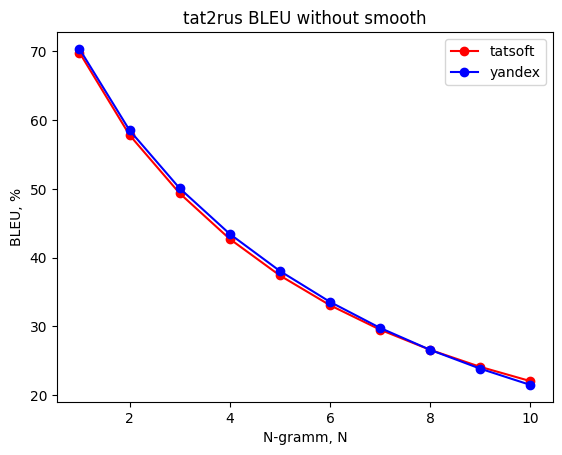

In [123]:
import matplotlib.pyplot as plt
plt.title('tat2rus BLEU without smooth')
plt.plot(range(1, 11), result_df.iloc[0, :], 'o-r', label='tatsoft')
plt.plot(range(1, 11), result_df.iloc[2, :], 'o-r', label='yandex', color='blue')
plt.xlabel('N-gramm, N', fontsize=10)
plt.ylabel('BLEU, %', fontsize=10)
plt.legend()
plt.show()

<ipython-input-124-22f83474f143>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(1, 11), result_df.iloc[6, :], 'o-r', label='yandex', color='blue')


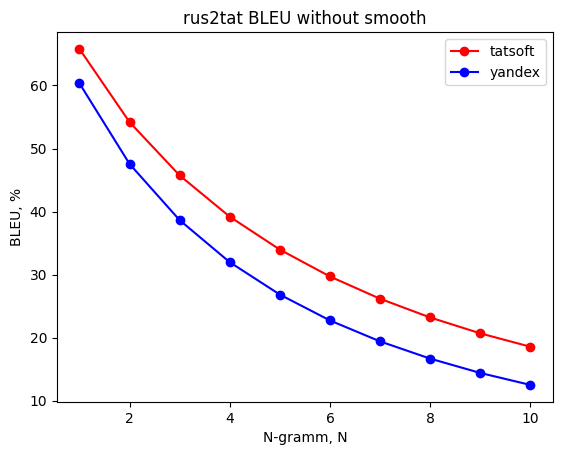

In [124]:
plt.title('rus2tat BLEU without smooth')
plt.plot(range(1, 11), result_df.iloc[4, :], 'o-r', label='tatsoft')
plt.plot(range(1, 11), result_df.iloc[6, :], 'o-r', label='yandex', color='blue')
plt.xlabel('N-gramm, N', fontsize=10)
plt.ylabel('BLEU, %', fontsize=10)
plt.legend()
plt.show()

<ipython-input-125-2709f6ec6a19>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(1, 11), np.array(result_df.iloc[3, :]) - np.array(result_df.iloc[2, :]), 'o-r', label='yandex', color='blue')


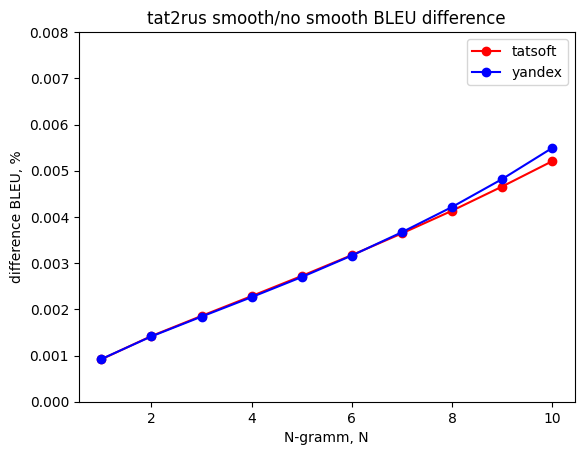

In [125]:
import numpy as np
plt.plot(range(1, 11), np.array(result_df.iloc[1, :]) - np.array(result_df.iloc[0, :]), 'o-r', label='tatsoft')
plt.plot(range(1, 11), np.array(result_df.iloc[3, :]) - np.array(result_df.iloc[2, :]), 'o-r', label='yandex', color='blue')
plt.ylim(0, 0.008)
plt.xlabel('N-gramm, N', fontsize=10)
plt.ylabel('difference BLEU, %', fontsize=10)
plt.legend()
plt.title('tat2rus smooth/no smooth BLEU difference')
plt.show()

<ipython-input-102-073c37259686>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "o-r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(range(1, 11), np.array(result_df.iloc[7, :]) - np.array(result_df.iloc[6, :]), 'o-r', label='yandex', color='blue')


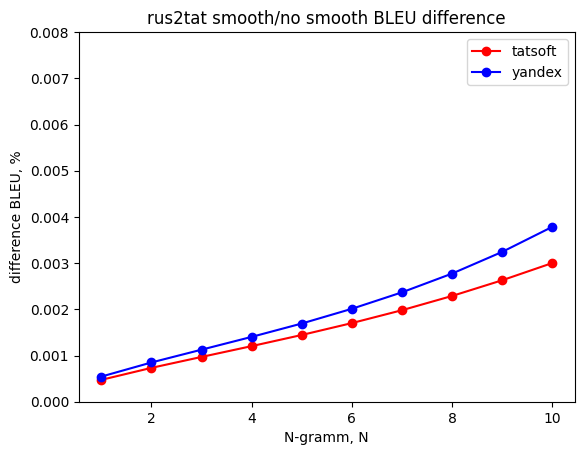

In [102]:
plt.plot(range(1, 11), np.array(result_df.iloc[5, :]) - np.array(result_df.iloc[4, :]), 'o-r', label='tatsoft')
plt.plot(range(1, 11), np.array(result_df.iloc[7, :]) - np.array(result_df.iloc[6, :]), 'o-r', label='yandex', color='blue')
plt.ylim(0, 0.008)
plt.xlabel('N-gramm, N', fontsize=10)
plt.ylabel('difference BLEU, %', fontsize=10)
plt.legend()
plt.title('rus2tat smooth/no smooth BLEU difference')
plt.show()

In [ ]:
results = bleu.compute(predictions=tatsoft_list_tat, references=tat_list, smooth=True)
print(results)

{'bleu': 0.2571451573221921, 'precisions': [0.45149182110942865, 0.29717033888826755, 0.21083203988523588, 0.15456866000842606], 'brevity_penalty': 1.0, 'length_ratio': 1.4340153530904975, 'translation_length': 46888, 'reference_length': 32697}


In [ ]:
results = bleu.compute(predictions=tatsoft_list, references=rus_list, smooth=True)
print(results)

{'bleu': 0.32365881813559916, 'precisions': [0.5323671279808863, 0.36406524109809874, 0.27168179204480114, 0.20840051809362692], 'brevity_penalty': 1.0, 'length_ratio': 1.3173679365739228, 'translation_length': 44365, 'reference_length': 33677}


In [ ]:
results = bleu.compute(predictions=tatsoft_list, references=rus_list, max_order=5)
print(results)

{'bleu': 0.28239930475763436, 'precisions': [0.5323565873999775, 0.36405016476612695, 0.27166358317915895, 0.2083795929156754, 0.16370714765852565], 'brevity_penalty': 1.0, 'length_ratio': 1.3173679365739228, 'translation_length': 44365, 'reference_length': 33677}


In [ ]:
results = bleu.compute(predictions=tatsoft_list, references=rus_list, max_order=3)
print(results)

{'bleu': 0.3747990053397568, 'precisions': [0.5323565873999775, 0.36405016476612695, 0.27166358317915895], 'brevity_penalty': 1.0, 'length_ratio': 1.3173679365739228, 'translation_length': 44365, 'reference_length': 33677}


In [ ]:
results = bleu.compute(predictions=tatsoft_list, references=rus_list, smooth=True, max_order=3)
print(results)

{'bleu': 0.3748150266653109, 'precisions': [0.5323671279808863, 0.36406524109809874, 0.27168179204480114], 'brevity_penalty': 1.0, 'length_ratio': 1.3173679365739228, 'translation_length': 44365, 'reference_length': 33677}


In [ ]:
import nltk


for i in range(2184):
  pass

# BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
# print(BLEUscore)

In [ ]:


hypothesis = ['It', 'is', 'a', 'cat', 'at', 'room']
reference = ['It', 'is', 'a', 'cat', 'inside', 'the', 'room']
#there may be several references
BLEUscore = nltk.translate.bleu_score.sentence_bleu([reference], hypothesis)
print(BLEUscore)

0.4548019047027907
